In [1]:
import minna_functions as mf

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()
import numpy as np

In [160]:
#list of dates in UNIX
c.execute('''select * from matches
             where Season == 2011
            ''')
df_matches = pd.DataFrame(c.fetchall())
dates = df_matches[3]
review = pd.to_datetime(pd.Series(dates))
df_matches[3] = review

dates_UNIX = list(df_matches[3].astype(np.int64) // 10**9)

In [170]:
import requests

secret_key = '6451ebd4d55c9eaa573cda7e94ad37d0' 
latitude = 52.5200
longitude = 13.4050
date = dates_UNIX
URL = 'https://api.darksky.net/forecast/{}/{},{},{}?exclude=currently,flags,hourly,minutely,alerts'.format(secret_key, latitude, longitude, date)


In [171]:
URL

'https://api.darksky.net/forecast/6451ebd4d55c9eaa573cda7e94ad37d0/52.52,13.405,1310688000?exclude=currently,flags,hourly,minutely,alerts'

In [172]:
resp = requests.get(URL)

In [173]:
resp.status_code 

200

In [174]:
print (resp.text)

{"latitude":52.52,"longitude":13.405,"timezone":"Europe/Berlin","daily":{"data":[{"time":1310680800,"summary":"Mostly cloudy throughout the day.","icon":"partly-cloudy-day","sunriseTime":1310698952,"sunsetTime":1310757860,"moonPhase":0.52,"precipIntensity":0,"precipIntensityMax":0,"precipProbability":0,"temperatureHigh":63.81,"temperatureHighTime":1310742000,"temperatureLow":53.63,"temperatureLowTime":1310785200,"apparentTemperatureHigh":63.81,"apparentTemperatureHighTime":1310742000,"apparentTemperatureLow":53.63,"apparentTemperatureLowTime":1310785200,"dewPoint":50.11,"humidity":0.68,"windSpeed":14.1,"windGust":21,"windGustTime":1310742000,"windBearing":225,"cloudCover":0.73,"uvIndex":5,"uvIndexTime":1310727600,"visibility":6.212,"temperatureMin":56.63,"temperatureMinTime":1310698800,"temperatureMax":63.81,"temperatureMaxTime":1310742000,"apparentTemperatureMin":56.63,"apparentTemperatureMinTime":1310698800,"apparentTemperatureMax":63.81,"apparentTemperatureMaxTime":1310742000}]},"of

In [175]:
r = resp.json()

In [176]:
r.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'daily', 'offset'])

In [187]:
r['daily']['data'][0]['precipIntensity']

0

In [179]:
[r['daily']['data'][i]['time'] for i in range(0,len(r['daily']['data']))]

[1310680800]

In [158]:
type(r['daily']['data'][0]['time'])

int

In [260]:
from datetime import datetime

In [263]:
class scrape_dark_sky():
    
    
    def __init__(self):
        self.latitude = 52.5200
        self.longitude = 13.4050
        self.secret_key = '6451ebd4d55c9eaa573cda7e94ad37d0'
    
    def unix_list(self):
        c.execute('''SELECT * FROM matches
                     WHERE Season == 2011
                     ''')
        df_matches = pd.DataFrame(c.fetchall())
        dates = df_matches[3]
        review = pd.to_datetime(pd.Series(dates))
        df_matches[3] = review
        dates_UNIX = list(df_matches[3].astype(np.int64) // 10**9)
        return dates_UNIX
    
    def get_rain(self):
        
        temp = {}
        
        for date in scrape_dark_sky().unix_list()[:5:
            date = date
            URL = 'https://api.darksky.net/forecast/{}/{},{},{}?exclude=currently,flags,hourly,minutely,alerts'.format(self.secret_key, self.latitude, self.longitude, date)
        
            resp = requests.get(URL)
            r = resp.json()
            rain_for_day = r['daily']['data'][0]['precipIntensity']
            
            if rain_for_day == 0:
                rain_for_day = False 
            else:
                rain_for_day = True
                
            date = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')

    
            temp.update({date : rain_for_day})
        
        return temp
    
    
    
    
    
    

In [5]:
mf.scrape_dark_sky().get_rain()

{'2012-03-31': True,
 '2011-12-11': False,
 '2011-08-13': False,
 '2011-11-27': False,
 '2012-02-18': False}

In [ ]:
c.execute('''select * from matches
             where Season == 2011
            ''')
df_matches = pd.DataFrame(c.fetchall())
dates = df_matches[3]
review = pd.to_datetime(pd.Series(dates))
df_matches[3] = review

dates_UNIX = list(df_matches[3].astype(np.int64) // 10**9)

In [201]:
# temp = {}
# for date in dates_UNIX[:5]:
    
#     secret_key = '6451ebd4d55c9eaa573cda7e94ad37d0' 
#     latitude = 52.5200
#     longitude = 13.4050
#     date = date
#     URL = 'https://api.darksky.net/forecast/{}/{},{},{}?exclude=currently,flags,hourly,minutely,alerts'.format(secret_key, latitude, longitude, date)
    
    
#     resp = requests.get(URL)
#     r = resp.json()
#     rain_for_day = r['daily']['data'][0]['precipIntensity']
#     if rain_for_day == 0:
#         rain_for_day = False 
#     else:
#         rain_for_day = True
    
#     temp.update({date : rain_for_day})
    
    
    
    
    

In [202]:
temp

{1333152000: True,
 1323561600: False,
 1313193600: False,
 1322352000: False,
 1329523200: False}

In [ ]:
#df
#date #raining 

In [1]:
import minna_functions as mf

In [2]:
mf.scrape_dark_sky().get_rain()

{'2012-03-31': True,
 '2011-12-11': False,
 '2011-08-13': False,
 '2011-11-27': False,
 '2012-02-18': False}

In [7]:
import pandas as pd

In [9]:
df = pd.DataFrame(mf.total_wins(mf.total_teams()))

,Total_Wins
Team_Name,
Aachen,6
Arsenal,21
Aston Villa,7
Augsburg,8
Bayern Munich,23
Blackburn,8
Bochum,10
Bolton,10
Braunschweig,10


In [13]:
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()


In [25]:
c.execute('''SELECT Date, AwayTeam FROM MATCHES 
             WHERE FTR == 'A' 
             AND Season == 2011
             ''')
Away_Team_Wins = pd.DataFrame(c.fetchall())

In [29]:
Away_Team_Wins.head()

,0,1
0,2012-03-31,Bayern Munich
1,2011-12-11,Bayern Munich
2,2011-08-13,Bayern Munich
3,2012-04-21,Bayern Munich
4,2011-09-18,Bayern Munich


In [7]:
c.execute('''SELECT Date, HomeTeam FROM MATCHES 
             WHERE FTR == 'H' 
             AND Season == 2011''')
Home_Team_Wins = pd.DataFrame(c.fetchall())

In [8]:
Home_Team_Wins.head()

,0,1
0,2011-11-27,Mainz
1,2012-01-20,M'gladbach
2,2011-10-23,Hannover
3,2012-03-03,Leverkusen
4,2012-04-11,Dortmund


In [9]:
wins_and_date = Away_Team_Wins.append(Home_Team_Wins)
wins_and_date

,0,1
0,2012-03-31,Bayern Munich
1,2011-12-11,Bayern Munich
2,2011-08-13,Bayern Munich
3,2012-04-21,Bayern Munich
4,2011-09-18,Bayern Munich
5,2011-08-27,Bayern Munich
6,2012-03-17,Bayern Munich
7,2011-11-06,Bayern Munich
8,2012-05-05,Bayern Munich
9,2011-12-17,Dortmund


In [10]:
print(Home_Team_Wins.shape)
print(Away_Team_Wins.shape)
print(wins_and_date.shape)

(450, 2)
(279, 2)
(729, 2)


In [11]:
test_df = wins_and_date[:5]
test_df.set_index(0)

,1
0,
2012-03-31,Bayern Munich
2011-12-11,Bayern Munich
2011-08-13,Bayern Munich
2012-04-21,Bayern Munich
2011-09-18,Bayern Munich


In [66]:
test_dict = mf.scrape_dark_sky().get_rain()
test_dict

{'2012-03-31': True,
 '2011-12-11': False,
 '2011-08-13': False,
 '2011-11-27': False,
 '2012-02-18': False}

In [12]:
rain_df = pd.DataFrame.from_dict(test_dict, orient = 'index').reset_index()
rain_df

,index,0
0,2012-03-31,True
1,2011-12-11,False
2,2011-08-13,False
3,2011-11-27,False
4,2012-02-18,False


In [42]:
# rain_wins = pd.merge(left=test_df, right = rain_df, left_on = 0, right_on = 'index')
# rain_wins = rain_wins.drop(['key_0', '0_x'], axis = 1)
# rain_wins.columns = ['team', 'date', 'rain?']
# rain_wins

In [41]:
# #away team wins
# c.execute('''SELECT Date, AwayTeam, Hometeam FROM MATCHES 
#              WHERE FTR == 'A' 
#              AND Season == 2011
#              ''')
# Away_Team_Wins = pd.DataFrame(c.fetchall())
# Away_Team_Wins.columns = ['date', 'winning_team(Away)', 'losing_team(Home)']
# Away_Team_Wins.head()

In [39]:
# #home team wins 
# c.execute('''SELECT Date, HomeTeam, Awayteam FROM MATCHES 
#              WHERE FTR == 'H' 
#              AND Season == 2011''')
# Home_Team_Wins = pd.DataFrame(c.fetchall())
# Home_Team_Wins.columns = ['Date', 'winning_team(Home)', 'losing_team(Away)']
# Home_Team_Wins.head()

In [40]:
# #combine tables
# wins_and_date = Away_Team_Wins.append(Home_Team_Wins)
# wins_and_date.head()
# wins_and_date['all_wins'] = wins_and_date['winning_team(Away)'] + wins_and_date['winning_team(Home)']
# wins_and_date.head()

In [43]:





# #dictionary of date and if it rained
# test_dict = mf.scrape_dark_sky().get_rain()


# #turn it into DF
# rain_df = pd.DataFrame.from_dict(test_dict, orient = 'index').reset_index()
# #rain_df


# #combine total wins and rain table 
# rain_wins = pd.merge(left=test_df, right = rain_df, left_on = 0, right_on = 'index')
# rain_wins = rain_wins.drop(['key_0', '0_x'], axis = 1)
# rain_wins.columns = ['team', 'date', 'rain?']
# rain_wins



In [44]:
c.execute('''select * from matches
             where Season == 2011
             ORDER BY Date
            ''')
df_matches = pd.DataFrame(c.fetchall())
df_matches.columns = ['Match_ID',
'Div',
'Season',
'Date',
'HomeTeam',
'AwayTeam',
'FTHG',
'FTAG',
'FTR']
df_matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,2,1,H
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,2,3,A
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,1,1,D
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,1,0,H
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,2,0,H


In [46]:
#Creates New column using dictionary
df_matches['rain'] = df_matches.Date.apply(lambda x: test_dict[x])
df_matches

#filters our false raindays
games_in_rain = df_matches[df_matches['rain'] == True]
games_in_rain


KeyError: '2011-07-15'

In [22]:
rain_wins

,team,date,rain?
0,Bayern Munich,2012-03-31,True
1,Bayern Munich,2011-12-11,False
2,Bayern Munich,2011-08-13,False


In [49]:
#away team wins
c.execute('''SELECT Date, AwayTeam FROM MATCHES 
                     WHERE FTR == 'A' 
                     AND Season == 2011
                     ''')
Away_Team_Wins = pd.DataFrame(c.fetchall())


#home team wins 
c.execute('''SELECT Date, HomeTeam FROM MATCHES 
                     WHERE FTR == 'H' 
                     AND Season == 2011''')
Home_Team_Wins = pd.DataFrame(c.fetchall())

#combine tables
wins_and_date = Away_Team_Wins.append(Home_Team_Wins)
wins_and_date

#dictionary of date and if it rained
date_dict = mf.scrape_dark_sky().get_rain()

#turn it into DF
rain_df = pd.DataFrame.from_dict(date_dict, orient = 'index').reset_index()
#rain_df

#combine total wins and rain table 
rain_wins = pd.merge(left=wins_and_date, right = rain_df, left_on = 0, right_on = 'index')
rain_wins = rain_wins.drop(['key_0', '0_x'], axis = 1)
rain_wins.columns = ['team', 'Date', 'rain?']
rain_wins = rain_wins[rain_wins['rain?'] == True]
rain_wins

,team,Date,rain?
0,Bayern Munich,2012-03-31,True
1,Freiburg,2012-03-31,True
2,Hamburg,2012-03-31,True
3,Hansa Rostock,2012-03-31,True
4,Mainz,2012-03-31,True
5,Wolfsburg,2012-03-31,True
6,Chelsea,2012-03-31,True
7,Bolton,2012-03-31,True
8,Augsburg,2012-03-31,True
9,Everton,2012-03-31,True


In [1]:
import minna_functions as mf

In [2]:
scrape = mf.scrape_dark_sky()

In [4]:
len(scrape.temp)

0

In [2]:
soccer = mf.soccer_weather()

In [3]:
soccer.total_wins_in_rain("Klaiserslautern")

0.0

In [5]:
soccer.total_wins_in_rain('Chelsea')

8

In [6]:
type(soccer.total_games_in_rain('Tottenham'))

numpy.int64

In [7]:
round(soccer.rain_win_percentage('Chelsea'), 2)

57.14

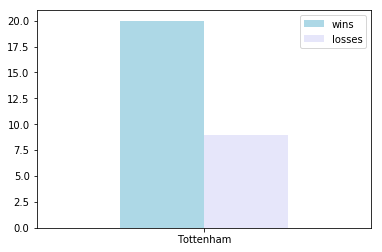

In [3]:
mf.histogram('Tottenham')

In [7]:
!pip install pymongo

In [14]:
import pymongo
import numpy as np

In [7]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017")
mydb = myclient['database']

In [8]:
print(myclient.list_database_names())

['admin', 'config', 'example_data', 'local', 'test']


In [9]:
mycollection = mydb['team_info']

In [19]:
soccer = mf.soccer_weather()

list_of_dicts = []
for team in mf.total_teams():
    team_dict = {}
    team_dict['name'] = team
    team_dict['total_goals_2011'] = str(mf.total_goals(team))
    team_dict['total_wins_2011'] = str(mf.total_wins(team))
    team_dict['total_rain_wins'] = str(soccer.rain_win_percentage(team))
    list_of_dicts.append(team_dict)



In [21]:
results_2 = mycollection.insert_many(list_of_dicts)

In [24]:
results_2.inserted_ids

[ObjectId('5d1a493371c701a4c1c5c62e'),
 ObjectId('5d1a493371c701a4c1c5c62f'),
 ObjectId('5d1a493371c701a4c1c5c630'),
 ObjectId('5d1a493371c701a4c1c5c631'),
 ObjectId('5d1a493371c701a4c1c5c632'),
 ObjectId('5d1a493371c701a4c1c5c633'),
 ObjectId('5d1a493371c701a4c1c5c634'),
 ObjectId('5d1a493371c701a4c1c5c635'),
 ObjectId('5d1a493371c701a4c1c5c636'),
 ObjectId('5d1a493371c701a4c1c5c637'),
 ObjectId('5d1a493371c701a4c1c5c638'),
 ObjectId('5d1a493371c701a4c1c5c639'),
 ObjectId('5d1a493371c701a4c1c5c63a'),
 ObjectId('5d1a493371c701a4c1c5c63b'),
 ObjectId('5d1a493371c701a4c1c5c63c'),
 ObjectId('5d1a493371c701a4c1c5c63d'),
 ObjectId('5d1a493371c701a4c1c5c63e'),
 ObjectId('5d1a493371c701a4c1c5c63f'),
 ObjectId('5d1a493371c701a4c1c5c640'),
 ObjectId('5d1a493371c701a4c1c5c641'),
 ObjectId('5d1a493371c701a4c1c5c642'),
 ObjectId('5d1a493371c701a4c1c5c643'),
 ObjectId('5d1a493371c701a4c1c5c644'),
 ObjectId('5d1a493371c701a4c1c5c645'),
 ObjectId('5d1a493371c701a4c1c5c646'),
 ObjectId('5d1a493371c701

In [1]:
import minna_functions as mf
import pandas as pd

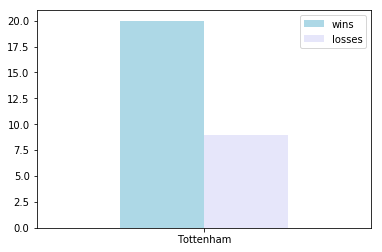

In [1]:
import minna_functions as mf

In [2]:
import pymongo

In [2]:
mongo_handler = mf.mongo_handler()

In [3]:
mongo_handler.info_to_dict()

[{'name': 'Aachen',
  'total_goals_2011': '30',
  'total_wins_2011': '6',
  'total_rain_wins': '23.08'},
 {'name': 'Arsenal',
  'total_goals_2011': '74',
  'total_wins_2011': '21',
  'total_rain_wins': '57.14'},
 {'name': 'Aston Villa',
  'total_goals_2011': '37',
  'total_wins_2011': '7',
  'total_rain_wins': '16.67'},
 {'name': 'Augsburg',
  'total_goals_2011': '36',
  'total_wins_2011': '8',
  'total_rain_wins': '36.36'},
 {'name': 'Bayern Munich',
  'total_goals_2011': '77',
  'total_wins_2011': '23',
  'total_rain_wins': '72.73'},
 {'name': 'Blackburn',
  'total_goals_2011': '48',
  'total_wins_2011': '8',
  'total_rain_wins': '10.0'},
 {'name': 'Bochum',
  'total_goals_2011': '41',
  'total_wins_2011': '10',
  'total_rain_wins': '27.27'},
 {'name': 'Bolton',
  'total_goals_2011': '46',
  'total_wins_2011': '10',
  'total_rain_wins': '33.33'},
 {'name': 'Braunschweig',
  'total_goals_2011': '37',
  'total_wins_2011': '10',
  'total_rain_wins': '44.44'},
 {'name': 'Chelsea',
  'tot